Derived from University of Michigan - ROB 101 Computational Linear Algebra


# Calculation, Matrices, and Graphing with Julia

#### Purpose:  Use Julia Programming to solve mathematical problems
- Outline:
    - Calculaton with Julia
        - Codeblocks and Operators
        - Functions for Computation and Display
    - Data Manipulation with Julia
        - Variables
        - Vectors
        - Matrices
        - Custom Functions
    - Graphing with Julia
        - Graphing Vectors
        - Visualizing Matrices
        - Saving Graphs (should allow us to get past some of the graphing problems)

In [18]:
#you can edit this code block by clicking into it
#pressing SHIFT+ENTER runs the block
#running a code cell will display the result from the last line

4+7

11

In [43]:
#other results are NOT displayed
5 * 6
6 / 3
4 == 2 #this operator returns true when the two sides are equal 


false

In [44]:
#Julia performs arithmetic operations in PEMDAS order:
#Parentheses, Exponentiation, Multiplication, Division, Addition, Subtraction

#TODO: Add parentheses to make this line return true
50 == 4 + 5 / 2 + 3 + 2 ^ 2 + 1


false

In [2]:
#operators are all actually functions in disguise!

+(2,3)

#still probably better to use 2 + 3 for readability

5

**Julia has many other built in functions.**

- round() #rounds to nearest integer
- ceil() #rounds up
- floor() #rounds down
- trunc() #chops off anything beyond decimal point
- abs() #absolute value
- sin(), cos(), tan()  and asin(), acos(), atan()  #many more trigonometric functions
- sqrt() #square root
- exp()  #natural exponential e^x
- log() #natural logarithm
- %() #remainder after division


and so many more: https://docs.julialang.org/en/v1/manual/mathematical-operations/


In [48]:
#the modulo function calculates remainder after division
#you can also call it like an operator for ease of use
10 % 3

1

In [49]:
#display and utility functions are also available
#to print multiple lines while running code, use println()
println(5 * 6)
println(6 / 3)
4 ^ 2 #we don't need a println call here because the last line is automatically shown

#...but julia adds a blank line before that output,
#so it is probably best to call println() regardless for aesthetics.


30
2.0


16

In [2]:
#Greek letters are supported in Julia! they're a bit annoying to type, though...
#in julia, pi = π = 3.14159...... by default.
println(pi == π)

#trigonometric functions use radians.
sin(π)
#because the computer can't store data with perfect precision, this will return a number which is very close to 0.
#that "e-16" is scientific notation for " * 10^(-16)"
#so the absolute value of this number is around .00000000000000001. 

true


1.2246467991473532e-16

In [35]:
abs("hello")  #uh oh


LoadError: MethodError: no method matching abs(::String)
Closest candidates are:
  abs(!Matched::Missing) at missing.jl:100
  abs(!Matched::Pkg.Resolve.FieldValue) at D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Resolve\fieldvalues.jl:61
  abs(!Matched::Float32) at float.jl:527
  ...

## I'm not convinced that this type discussion needs to be in the initial tutorial. It might be enough to say that Julia keeps track of datatypes under the hood, and if you get a Type Error, you're putting a piece of data into a function which doesn't support it.






This function doesn't work because "hello" is the wrong type of data.

**Every piece of data in Julia has a "Type"**

What is a data type? I think you would be comfortable saying that numbers are different from letters, so they should be treated differently when you work with them. Similary, a single letter is different than a sentence. 

So far, so good? 

Here is where programming languages are different than calculators: you may not have to think about numbers such as 1, 2, 3, 4, .... differently than 0.7, sqrt(2), pi, but Julia does have to handle them differently. 

Why? Just to make your life miserable? Not really. 

Computers have a limited amount of memory (zeros and ones) available to represent a number. If the computer knows that the number does not require a decimal point (as in -7, 0, 1, 45, etc,) then it can store it very compactly and hence store enormously large numbers of the non-decimal TYPE. If the number requires a decimal to express it properly (such as pi, sqrt(2), 0.6) then Julia will store it in a different format. In Julia, formats are determined by TYPES.

We will mostly use 4 of these TYPES:
- Int64:  Integers (numbers without decimal points in them)
- Float64: Floating point numbers (numbers that require decimal points)
- Char:  Any character you can type on a keyboard, or fancy characters like 复, 制, ¤, Ð, or ϐ (declared inside ' ')
- String: A bunch of characters in a line.  (This could be a word, or a sentence, or even a number that is in " ")

You don't usually have to worry about types because Julia will automatically choose a type that works best.  But, should you get a MethodError like the one above, check which type you are using.

If you want to know more about types in Julia: https://docs.julialang.org/en/v1/manual/types/

**Solving and graphing your own functions**

Julia can also help solve any equation that you input.  There are two main ways to declare a function in Julia.

Let's practice with the basic linear function:  
                                                y = 2x 

The first one is the most simple:

In [6]:
#These lines give Julia the ability to plot functions.  This may take a while, but it is necessary.
# When you see [*], that means Julia is working hard to do what you told it. Your commands may take just a few 
# lines, but Julia is probably dealing with multiple megabytes of files and code, all of which is hidden from us. 
using Plots
gr()

Plots.GRBackend()

If you are having any trouble with displaying graphs, you can use Julia's savefig() function. 

Navigate to the folder hosting this Notebook, and put savefig("name.png") as the last line of code (where "name.png" is the name for the saved plot).


Then you can manually open the saved .png via your computer's standard programs.

In [ ]:
#Only run this if you want to test if savefig() is working properly.

plot(1:10,1:10) #a plot
savefig("test.png")

In [ ]:
#I don't think that using plot(f,start,end) is productive. Plotting y,x seems like it is much better and generalizes more easily (we're essentially using a tiny end case for the function here)

#it also gives us the opportunity to talk about broadcasting and ranges.
#since the following call is essentially plot(f.(-5:5),-5:5)
#although that might be WAY too much.

#but frankly julia isn't much without matrix manipulation so broadcasting is pretty key to explain, I think. This would also be a lot easier if they were exposed to matrices via R (and from what I can tell R is very very vector/matrix focused as well, which would make sense as a statistical analysis program)



#now, we can use the plot() function





plot(f, -5, 5)  #f will be plotted over an x range of -5 to 5

If we wanted to change an element of the graph, we need to use the function **plot!()**

The exclamation point indicates that the function will modify the existing plot instead of replacing it.  Let's make the graph to scale with an aspect_ratio command, and label the axes.  You can also add an additional line to the plot.  Let's include the x-axis.

In [ ]:
plot!(aspect_ratio = 1, xlabel = "x", ylabel = "y")
g(x) = 0
plot!(g, -15,15)

We can now find that y = 2x intersects y = 0 at (0,0).  
### Problem 2. Practice with one of the systems in your HW1 Assignment

                                                    x − 2y = −2
                                                     x + y = 4
                                                
                                                
                                                
Step 1:  Rearrange Both equations so that y is isolated on the left side:

Equation 1: y1 = ____________
Equation 2: y2 = ____________

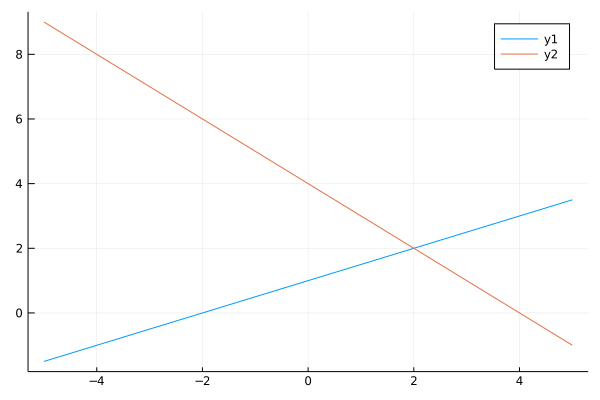

In [8]:
#now declare both of those equations as code functions y1(x) and y2(x)

# your code here
y1(x) = 1 + x/2
y2(x) = 4-x

#Plot them on the same graph.  This shows another way to plot multiple things at once
plot([y1,y2], -5, 5)

Now that you have plotted the system, you can find the solution as the intersection of the lines.  Pretty neat!